# **Leitura dos arquivos e mudanças de índices**

Rafael dos Santos - 2 ENG A

In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

# Introdução
Esse estudo tem por objetivo saber se a idade de casamento e a quantidade de filhos por mulheres tem relação direta ou indireta com o IDH. E vamos analizar isso pois no senso comum acreditasse que os paises mais ricos (e com isso maior IDH) tem uma taxa de natalidade menor e fiquei curioso para saber se a idade de casamento afetaria a quantidade de filhos.


In [84]:
#Leitura dos arquivos em Excel

HDI = pd.read_excel('hdi_human_development_index.xlsx')
Children_Woman = pd.read_excel('children_per_woman_total_fertility.xlsx')
Age_marriage = pd.read_excel('age_at_1st_marriage_women.xlsx')

In [85]:
#Selecionar apenas o ano de 2005, pois é o ano com mais dados

HDI_2005 = HDI.loc[:, ["geo", 2005]]
Children_Woman_2005 = Children_Woman.loc[:, ["geo", 2005]]
Age_marriage_2005 = Age_marriage.loc[:, ['geo',2005]]

Index change

In [86]:
HDI_idx = HDI_2005.set_index('geo')
Children_Woman_idx = Children_Woman_2005.set_index('geo')
Age_marriage_idx = Age_marriage_2005.set_index('geo')
Age_marriage_idx['2005_Marriage'] = Age_marriage_idx.pop(2005)
HDI_idx = HDI_idx.dropna()
Children_Woman_idx = Children_Woman_idx.dropna()
Age_marriage_idx = Age_marriage_idx.dropna()

DataFrame join

In [87]:
df = HDI_idx.join(Children_Woman_idx, how='inner', lsuffix='_HDI', rsuffix='_Children')
df = df.join(Age_marriage_idx, how='inner')
df.head(7)

,2005_HDI,2005_Children,2005_Marriage
geo,,,
Afghanistan,0.405,6.83,17.8
Albania,0.696,1.75,23.3
Algeria,0.686,2.50,29.6
Argentina,0.782,2.45,23.3
Armenia,0.692,1.40,23.0
Australia,0.915,1.86,28.9
Austria,0.854,1.41,28.9


Tabela de Corelação 

In [93]:
print('             Tabela Correlação 1')
df.corr()


             Tabela Correlação 1


,2005_HDI,2005_Children,2005_Marriage
2005_HDI,1.000000,-0.868473,0.762423
2005_Children,-0.868473,1.000000,-0.655110
2005_Marriage,0.762423,-0.655110,1.000000


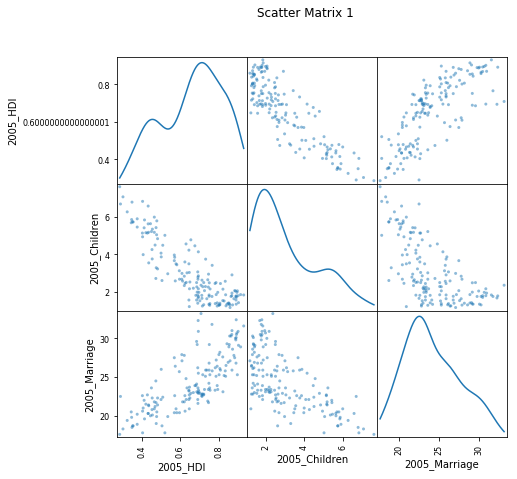

In [89]:
pd.plotting.scatter_matrix(df,figsize=(7,7), diagonal='kde');
plt.suptitle('Scatter Matrix 1')
plt.show()

## Estrapolando para outros anos
No caso apenas 1970 pois é o único ano que possuimos dados da quantidade de filhos por mulher suficientes para analize, infelizmente nesse ano o IDH ainda não existia, impossibitando a analize com o uso do IDH. Por causa disso vamos utilizar um dos componentes do IDH o PIB/capita.

Nas proximas celulas iremos fazer a leitura dos dados, a seleção das colunas desejadas a reindexicação e a criacao de um novo data frame com todas as colunas desejadas.

In [97]:
PIB_Capita = pd.read_excel('income_per_person_gdppercapita_ppp_inflation_adjusted.xlsx')

In [16]:
Children_Woman_1970 = Children_Woman.loc[:, ["geo", 1970]]
Age_marriage_1970 = Age_marriage.loc[:, ['geo',1970]]
PIB_Capita_1970 = PIB_Capita.loc[:, ['geo',1970]]

In [55]:
PIB_Capita_idx = PIB_Capita_1970.set_index('geo')
Age_marriage_idx2 = Age_marriage_1970.set_index('geo')
Children_Woman_idx2 = Children_Woman_1970.set_index('geo')


In [65]:
novo_df = PIB_Capita_idx.join(Children_Woman_idx2, how='inner', lsuffix='_PIB/capita', rsuffix='_Marriage')
novo_df = novo_df.join(Age_marriage_idx2, how='inner')
novo_df['1970_Children'] = novo_df.pop(1970)
novo_df = novo_df.dropna()


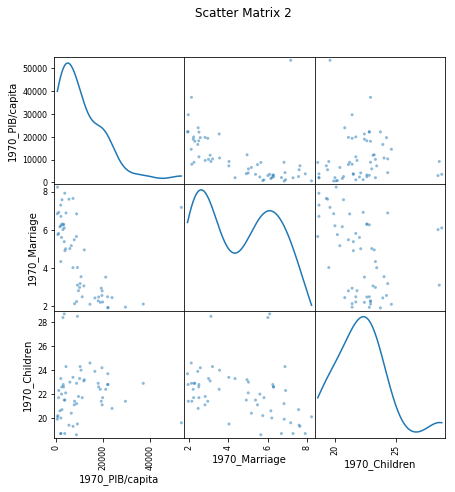

In [79]:
pd.plotting.scatter_matrix(novo_df,figsize=(7,7), diagonal='kde');
plt.suptitle('Scatter Matrix 2')
plt.show()

In [95]:
print('             Tabela Correlação 2')
novo_df.corr()


             Tabela Correlação 2


,1970_PIB/capita,1970_Marriage,1970_Children
1970_PIB/capita,1.000000,-0.535504,0.037320
1970_Marriage,-0.535504,1.000000,-0.370389
1970_Children,0.037320,-0.370389,1.000000


# Conclusão
A analise do Scatter Matrix 1 e da Tabela de Correlação 1 nos mostrou que tem uma forte correlação entre as 3 variaveis, tendo uma pequena anomalia em alguns paises com IDH mediano em relação a quantidade de filhos pois ouve muita propaganda de métodos contraceptivos neles e a renda deles permite a compra dos mesmos.

Já quando vamos analizar o Scatter Matrix 2 e a Tabela de Correlação 2 percebemos que essa correlação é basicamente inexistente entre todas as colunas com execção do PIB/Capita, substituto do IDH, e idade do casamento que fica relativamente bem correlacionado tendo como coeficiente de correlação de Pearson -0.53, essa brusca mudança se deve pela entrada da mulher no mercado de trabalho pós 1970, fez com que muitas mulheres buscassem uma vida acadêmica ou profissional mais completa, o que pode afetar a idade de casamento delas e a quantidade de filhos que elas tem.

In [96]:
dados2005 = df.to_csv()
dados1970 = novo_df.to_csv()

with open('dados2005.csv', 'w') as arq:
    arq.write(dados2005)

with open('dados1970.csv', 'w') as arq:
    arq.write(dados1970)